In [1]:
import itertools
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import functools 
from itertools import product
import sys
sys.path.append('../Environments/')
from ColoredGridWorld import SetUpInferenceSpace as setUp
from ColoredGridWorld import visualizations
sys.path.append('../Algorithms/')
from ActionInterpretation import ActionInterpretation
from ActionInterpretationEveryStep import ActionInterpretationEveryStep

In [2]:
dimensions = (5,6)
goals = [(5,2)]
actions = [(-1,0),(0,1),(0,-1),(1,0)]
goalNameDictionary = {(5,2):'goal'}
stateSpace = {(0,0): 'white',(0,1): 'white',(0,2): 'white',(0,3): 'white',(0,4): 'white', (1,0): 'blue',(1,1): 'orange', (1,2):'orange',(1,3):'orange',(1,4):'orange', (2,0): 'blue',(2,1):'purple', (2,2):'purple', (2,3):'purple', (2,4):'orange', (3,0): 'blue',(3,1):'purple',(3,2): 'blue',(3,3):'purple',(3,4):'orange', (4,0): 'blue', (4,1): 'blue', (4,2): 'blue',(4,3):'purple', (4,4):'orange', (5,0):'white',(5,1):'white', (5,2):'yellow', (5,3):'white', (5,4):'white'}
convergenceTolerance = 10e-7
gamma = 0.94
alpha = 20
eps = 0.01
hyperparameters = (convergenceTolerance, gamma, alpha, eps)
variableColours = ['orange', 'purple', 'blue']
variableReward = [0, -2]
constantRewardDict = {'white': 0, 'yellow': 10}


utilitySpace = setUp.buildUtilitySpace(variableColours, variableReward, constantRewardDict)
transitionSpace = [True]
worlds = setUp.buildWorldSpace(utilitySpace, transitionSpace)
envSpace = [(world, goal) for world, goal in product(worlds, goals)]
envMDPsAndPolicies = setUp.buildEnvPolicySpace(dimensions, stateSpace, actions, envSpace, hyperparameters)
priors = {(env): (1/len(envSpace)) for env in envSpace}
hashablePriors = setUp.HashableBelief(priors)


inference = ActionInterpretation(envMDPsAndPolicies)  
trajectory = [(0,2), (1,0), (1,2), (1,0), (2,2), (1,0), (3,2), (1,0), (4,2), (1,0), (5,2)]
trajectory2 = [(0,2), (0,-1), (0,1), (0,-1), (0,0), (1,0), (1,0), (1,0), (2,0), (0,1), (2,1), (0,1), (2,2),(1,0), (3,2), (1,0), (4,2), (1,0), (5,2)]
testWorld2 = setUp.HashableWorld({'white': 0, 'orange': -2, 'purple': -2, 'blue':-2, 'yellow': 10} ,True)
testWorld = setUp.HashableWorld({'white': 0, 'orange': 0, 'purple': 0, 'blue':0, 'yellow': 10} ,True)
Probab = inference(trajectory, hashablePriors, testWorld, goals[0], False)
Probab2 = inference(trajectory, hashablePriors, testWorld2, goals[0], False)
beliefVector = inference(trajectory, hashablePriors)
beliefVectorDict = beliefVector()
for env, prob  in beliefVectorDict.items():
    print(env[0](), env[1], prob)
print("Probability of the given world1 and goal for trajectory is " + str(Probab))
print("Probability of the given world2 and goal for trajectory is " + str(Probab2))

{'orange': 0, 'purple': 0, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.6780828400659158
{'orange': 0, 'purple': 0, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 1.080964153133097e-06
{'orange': 0, 'purple': -2, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.0036904669866335707
{'orange': 0, 'purple': -2, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 2.156042825379863e-06
{'orange': -2, 'purple': 0, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.0038231297086904997
{'orange': -2, 'purple': 0, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 3.670095310431231e-07
{'orange': -2, 'purple': -2, 'blue': 0, 'white': 0, 'yellow': 10} (5, 2) 0.0017081457236816369
{'orange': -2, 'purple': -2, 'blue': -2, 'white': 0, 'yellow': 10} (5, 2) 0.312691813498569
Probability of the given world1 and goal for trajectory is 0.6780828400659158
Probability of the given world2 and goal for trajectory is 0.312691813498569


In [3]:
inferenceEveryStep = ActionInterpretationEveryStep(envMDPsAndPolicies)
envPosteriorsEveryStep = inferenceEveryStep(trajectory, hashablePriors)

In [4]:
orderOfTrapColours = ('orange', 'purple', 'blue')
D = setUp.mapEnvToLabel(envPosteriorsEveryStep, orderOfTrapColours)

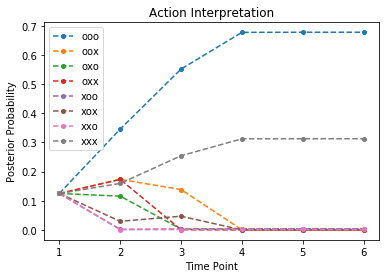

In [5]:
visualizations.plotProbAtEachStep(D, "Action Interpretation")

In [6]:
#to convert the dictionary of lists to a list of dictionaries 
v = [dict(zip(D,t)) for t in zip(*D.values())]

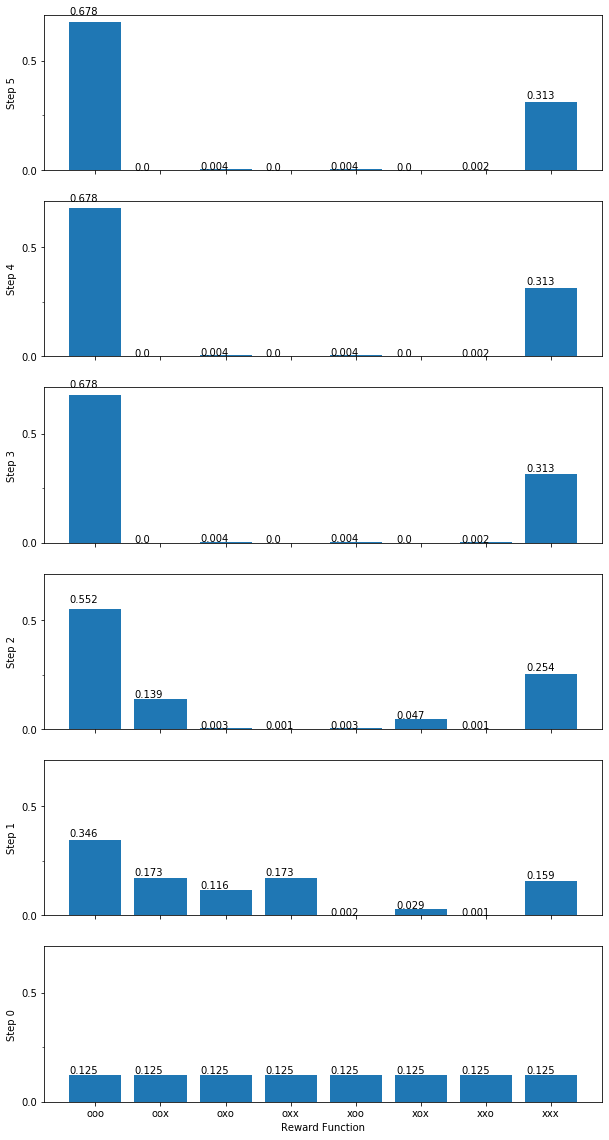

In [8]:
visualizations.plotDictAtEachStep(v, showHeight = True)